**MODUPEOLA OYATOKUN : C0895705**

**UPLOAD LIBRARIES**

In [66]:
# TensorFlow and tf.keras and important libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


**Load the Dataset.**

In [67]:
# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Dataset structure
print(f'Training data shape: {x_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Test labels shape: {y_test.shape}')




Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [72]:
# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


**DATA PREPROCESSING**

In [73]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images to 1D array
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)


**VISUALIZATION**

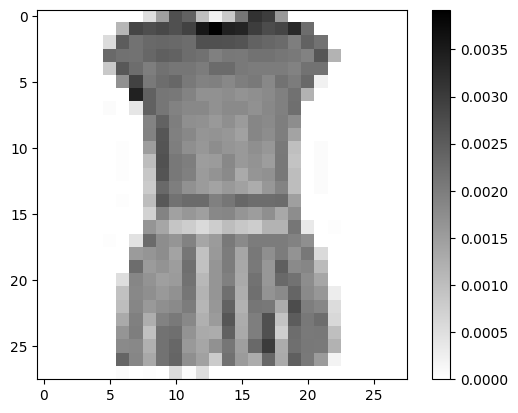

In [74]:
# Inspect and visualize the fourth image from the Fashion MNIST dataset
plt.figure()                 # Creates a new figure for plotting
plt.imshow(x_train[3].reshape(28, 28), cmap=plt.cm.binary)  # Displays the fourth image in the training set
plt.colorbar()               # Adds a colorbar to the side of the image to show the mapping of pixel values to colors
plt.grid(False)              # Disables the grid lines on the plot
plt.show()                   # Renders the plot to the screen



**Visualize Multiple Images**

To illustrate the distribution of various classes within the Fashion MNIST dataset's training set. It utilizes the Seaborn library for plotting, complemented by Matplotlib functions for customizing the appearance. The plot visualizes the sample counts for each class, where the x-axis denotes the classes labeled with their descriptive names, and the y-axis indicates the corresponding sample counts. To enhance readability.

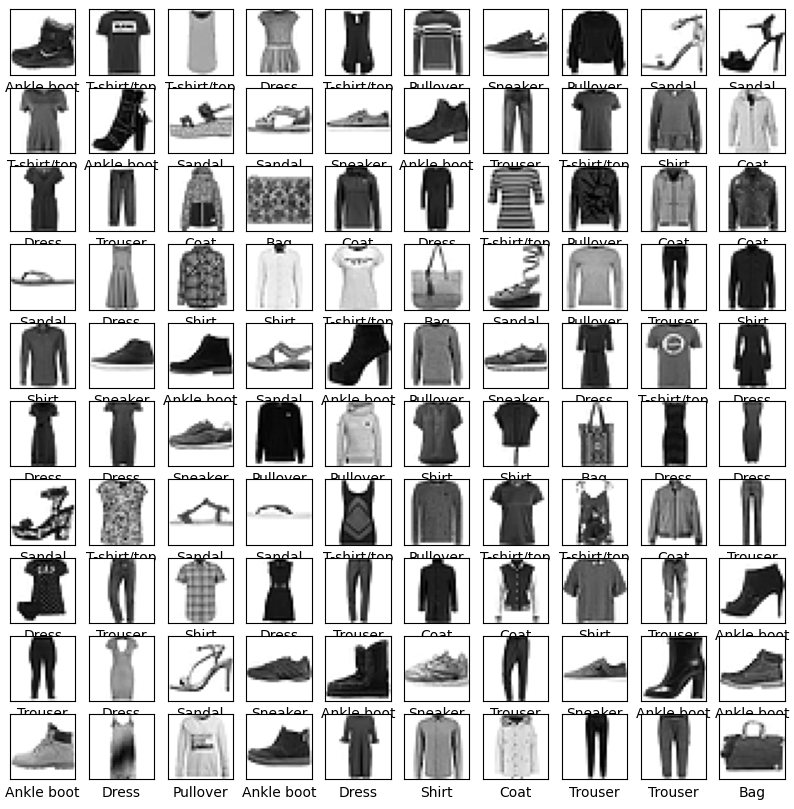

In [80]:
# Visualize multiple images
def plot_images(images, labels, class_names, num_rows=10, num_cols=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_rows * num_cols): #iterates over the range of the total number of images to be plotted
        plt.subplot(num_rows, num_cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False) #removes the grid lines from the plot.
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]]) #Sets the x-axis label of the subplot to the class name corresponding to the i-th image's label.
    plt.show() #Displays the entire figure with all the subplots.

# Plot 25 images from the training set
plot_images(x_train, y_train, class_names)




**Bar Chart**

The plot helps to quickly understand how the data is distributed across different classes, which is essential for assessing class imbalance and other data characteristics before training a machine learning model.

<ipython-input-81-5332a4fc1ccf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


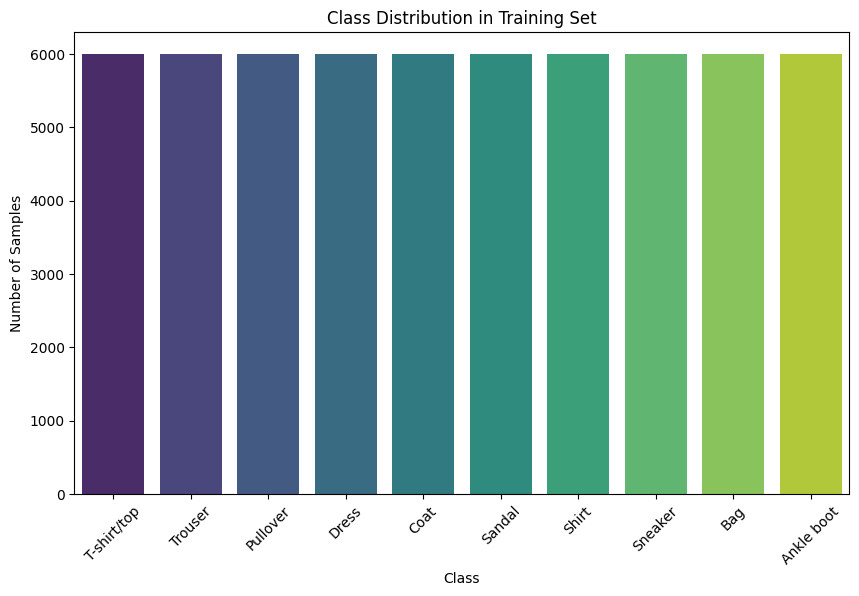

In [81]:
# Bar chart for class distribution
import seaborn as sns
plt.figure(figsize=(10, 6)) #creates a new figure for plotting with a size of 10 inches wide and 6 inches tall.
sns.countplot(x=y_train, palette='viridis') #a count plot using Seaborn and specifies that the x-axis should represent the labels in y_train
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.xlabel('Class') #sets the label for the x-axis to 'Class'
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Set') #sets the title of the plot to 'Class Distribution in Training Set
plt.show()


**MODEL BIUILDING**

The First Dense layer contains 128 neurons using ReLU activation, designed to receive input formatted as a flattened 28x28 image. Following this, a Dropout layer randomly deactivates 20% of its input units during training to mitigate overfitting. The subsequent Dense layer comprises 64 neurons with ReLU activation, followed by another Dropout layer with a 20% dropout rate. Finally, the output Dense layer consists of 10 neurons employing softmax activation, generating a probability distribution across the 10 classes found in the Fashion MNIST dataset.

In [82]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)), #First Layer: Dense Layer with 128 Units and Specifies the shape of the input data, which is a 1D array

    Dropout(0.2),
    Dense(64, activation='relu'),#ReLU is used in hidden layers of neural networks
    Dropout(0.2),
    Dense(10, activation='softmax')#Softmax converts the outputs into a probability distribution over the 10 classes
])


**Compile the Model**

The Adam optimizer for optimizing the model's weights, uses sparse categorical cross-entropy as the loss function to guide the training process, and monitors the accuracy metric to assess the model's performance.

In [83]:
#Choose an appropriate loss function, optimizer, and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  #adam refers to the Adam optimizer, which is an adaptive learning rate optimization algorithm and accuracy' is a common metric used in classification tasks


**Train and Evaluate the Model**

The code trains a neural network on the Fashion MNIST dataset, assesses its performance on new test data, and illustrates the evolution of its accuracy and loss across epochs during both training and validation. This visualization aids in comprehending the model's learning progress and identifying potential overfitting concerns.

Epoch 1/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3272 - accuracy: 0.8849 - val_loss: 0.3338 - val_accuracy: 0.8849
Epoch 2/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3214 - accuracy: 0.8866 - val_loss: 0.3221 - val_accuracy: 0.8901
Epoch 3/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3176 - accuracy: 0.8878 - val_loss: 0.3326 - val_accuracy: 0.8840
Epoch 4/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3170 - accuracy: 0.8880 - val_loss: 0.3287 - val_accuracy: 0.8847
Epoch 5/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3107 - accuracy: 0.8884 - val_loss: 0.3278 - val_accuracy: 0.8883
Epoch 6/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3100 - accuracy: 0.8912 - val_loss: 0.3360 - val_accuracy: 0.8830
Epoch 7/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3068 - accuracy: 0.8921 - val_loss: 0.3319 -

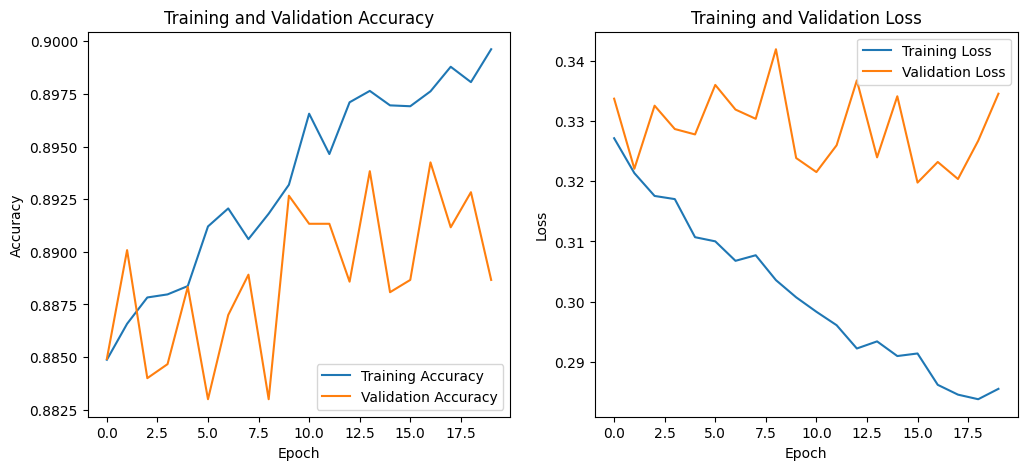

In [16]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2) #Train the model and epoch specifies the number of times the model will iterate over the entire training dataset during training

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


**Prediction**

This code section uses a trained neural network model to predict the class labels of images in the Fashion MNIST test set. It then displays the first 10 images with their true and predicted labels, enabling evaluation of the model's performance and identification of areas where it performs well or encounters challenges in classification.


313/313 [==============================] - 1s 4ms/step


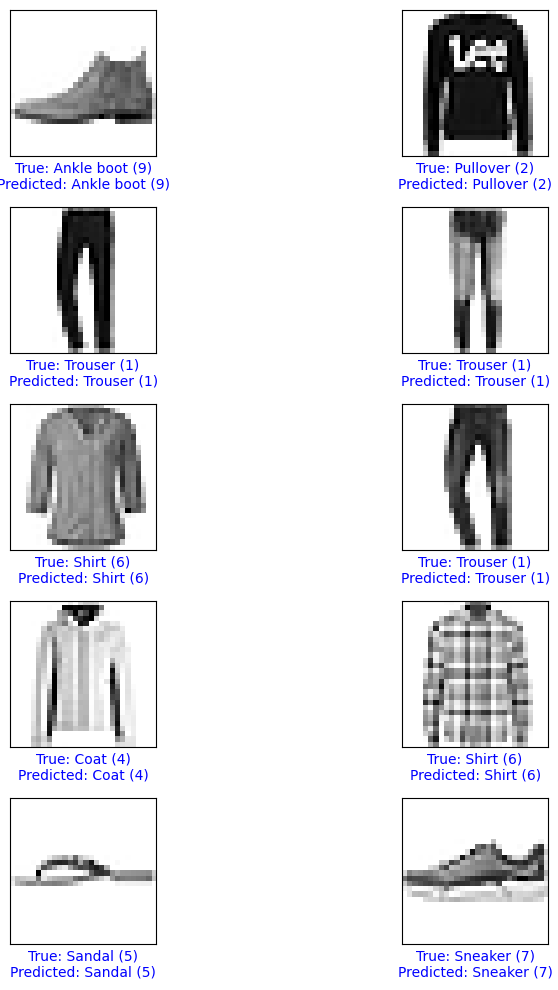

In [17]:
# Predict on test set
predictions = model.predict(x_test)

# Display a few predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    true_label_name = class_names[true_label]
    predicted_label_name = class_names[predicted_label]
    color = 'blue' if true_label == predicted_label else 'red'
    plt.xlabel(f'True: {true_label_name} ({true_label})\nPredicted: {predicted_label_name} ({predicted_label})', color=color)

# Display the first 10 predictions
num_rows = 5
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test, x_test)
plt.tight_layout()
plt.show()


**MODEL 2**

**Model Build**

In [28]:
# Build the model

model = Sequential([
    Dense(256, activation='relu', input_shape=(28 * 28,)), #the first dense layer with 256 neurons. It uses ReLU (Rectified Linear Unit) activation function
    Dropout(0.3), #Dropout layer with a dropout rate of 0.3.
    Dense(128, activation='relu'), #Second dense layer with 128 neurons and ReLU activation.
    Dropout(0.3), #Dropout layer with a dropout rate of 0.3.
    Dense(64, activation='relu'), #Third dense layer with 64 neurons and ReLU activation.
    Dropout(0.3),
    Dense(32, activation='relu'), #Fourth dense layer with 32 neurons and ReLU activation.
    Dropout(0.3),
    Dense(10, activation='softmax')
]) #the softmax activation function, which outputs a probability distribution over these 10 classes, representing the likelihood of each class being the correct label for a given input image



**Compile Model 2**

The Adam optimizer for optimizing the model's weights, uses sparse categorical cross-entropy as the loss function to guide the training process, and monitors the accuracy metric to assess the model's performance

In [29]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



**Train and Evalute the Model 2**

The code trains a neural network on the Fashion MNIST dataset, assesses its performance on new test data, and illustrates the evolution of its accuracy and loss across epochs during both training and validation.

Epoch 1/20
1500/1500 [==============================] - 15s 9ms/step - loss: 0.8623 - accuracy: 0.6942 - val_loss: 0.5180 - val_accuracy: 0.7994
Epoch 2/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5661 - accuracy: 0.8064 - val_loss: 0.4523 - val_accuracy: 0.8380
Epoch 3/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.5097 - accuracy: 0.8273 - val_loss: 0.4207 - val_accuracy: 0.8467
Epoch 4/20
1500/1500 [==============================] - 14s 10ms/step - loss: 0.4790 - accuracy: 0.8362 - val_loss: 0.3972 - val_accuracy: 0.8579
Epoch 5/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4650 - accuracy: 0.8423 - val_loss: 0.3844 - val_accuracy: 0.8619
Epoch 6/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.4446 - accuracy: 0.8470 - val_loss: 0.3750 - val_accuracy: 0.8634
Epoch 7/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4293 - accuracy: 0.8517 - val_loss: 0.3692 - val_

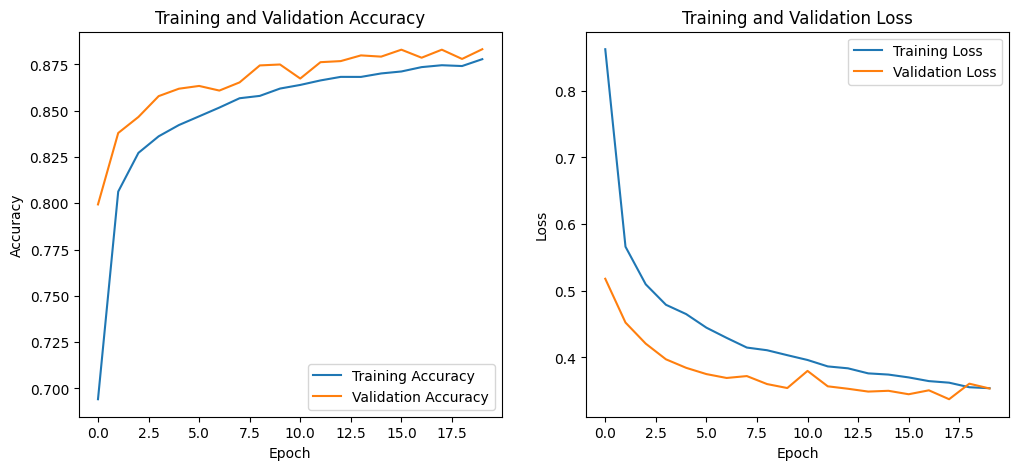

In [22]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


**Prediction**

It displays the first 25 images with their true and predicted labels, enabling evaluation of the model's performance and identification of areas where it performs well or encounters challenges in classification.

313/313 [==============================] - 1s 3ms/step


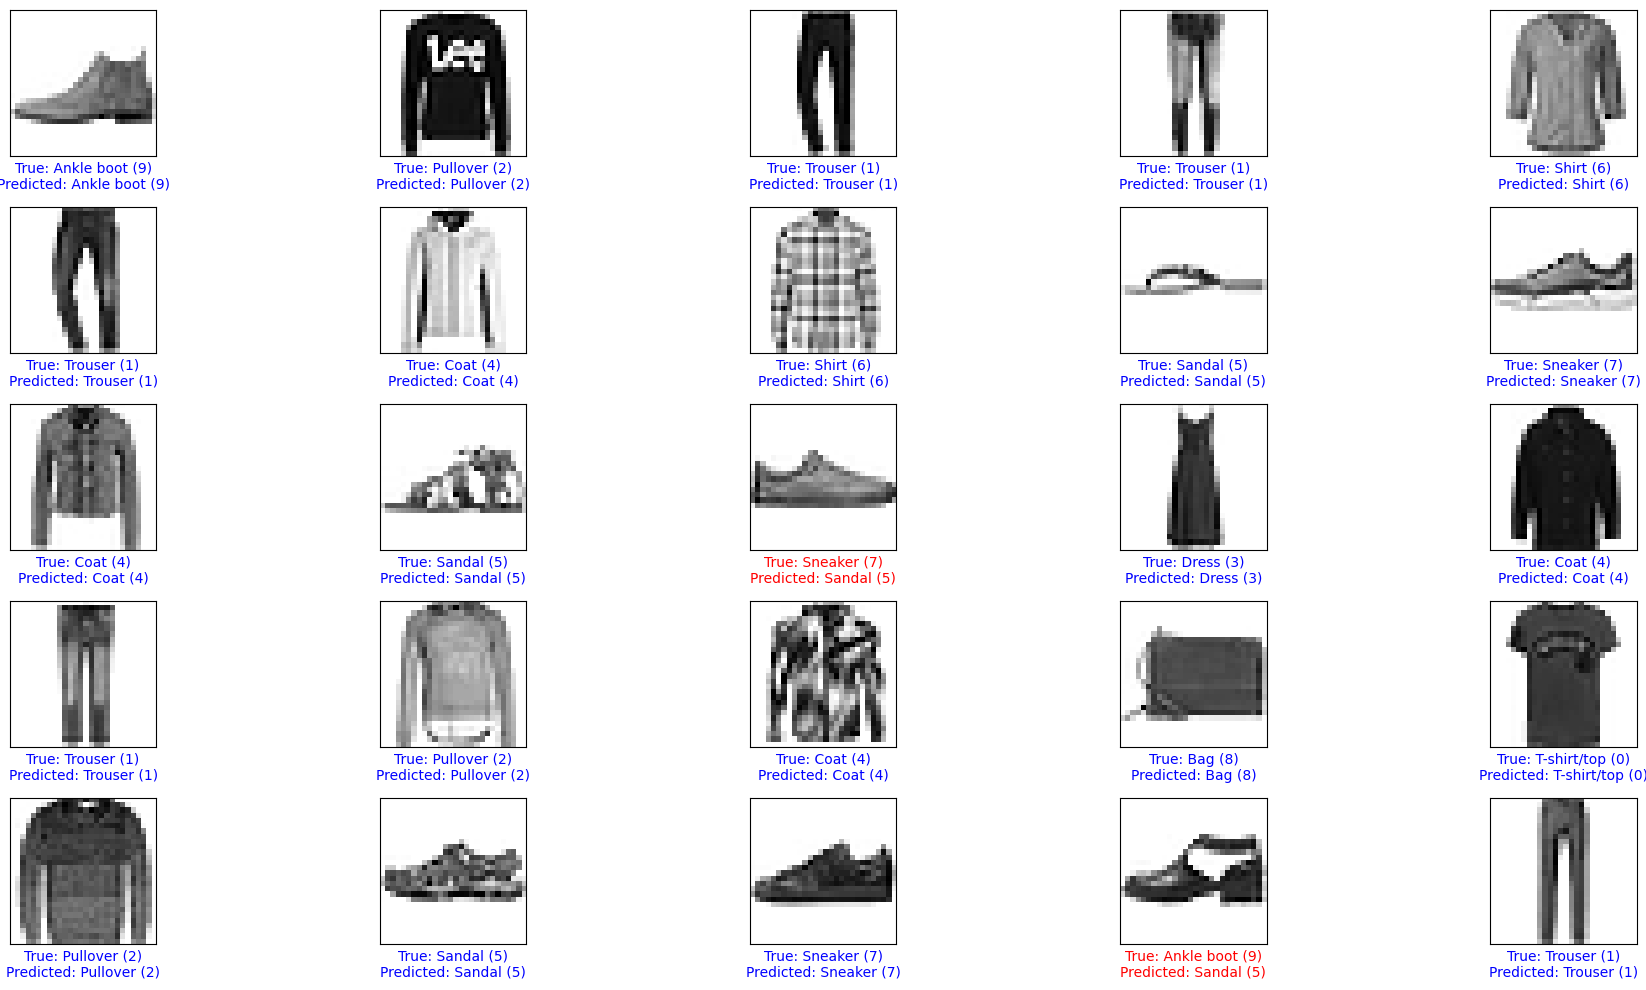

In [23]:
# Predict on the test set
predictions = model.predict(x_test)

# Class names for Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to plot a single image and prediction
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    true_label_name = class_names[true_label]
    predicted_label_name = class_names[predicted_label]
    color = 'blue' if true_label == predicted_label else 'red'
    plt.xlabel(f'True: {true_label_name} ({true_label})\nPredicted: {predicted_label_name} ({predicted_label})', color=color)

# Display the first 10 predictions
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plot_image(i, predictions, y_test, x_test)
plt.tight_layout()
plt.show()

**MODEL 3**

**Model Building**

The first dense layer with 320 neurons and ReLU activation, the second dense layer 256 neurons, Third 128 neurons and the fourth is 64 neurons. It uses the softmax activation function, which outputs a probability distribution over these 10 classes, representing the likelihood of each class being the correct label for a given input image.

In [30]:
# Build the model

model = Sequential([
    Dense(320, activation='relu', input_shape=(28 * 28,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])



**Compile the Model 3**

In [25]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



**Train and Evaluate Model 3**

Epoch 1/20
1500/1500 [==============================] - 16s 10ms/step - loss: 0.7181 - accuracy: 0.7387 - val_loss: 0.4853 - val_accuracy: 0.8362
Epoch 2/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5081 - accuracy: 0.8210 - val_loss: 0.4102 - val_accuracy: 0.8500
Epoch 3/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4679 - accuracy: 0.8360 - val_loss: 0.3981 - val_accuracy: 0.8546
Epoch 4/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4369 - accuracy: 0.8451 - val_loss: 0.3840 - val_accuracy: 0.8657
Epoch 5/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4246 - accuracy: 0.8494 - val_loss: 0.3748 - val_accuracy: 0.8608
Epoch 6/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.4072 - accuracy: 0.8565 - val_loss: 0.3637 - val_accuracy: 0.8751
Epoch 7/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3921 - accuracy: 0.8618 - val_loss: 0.3681 -

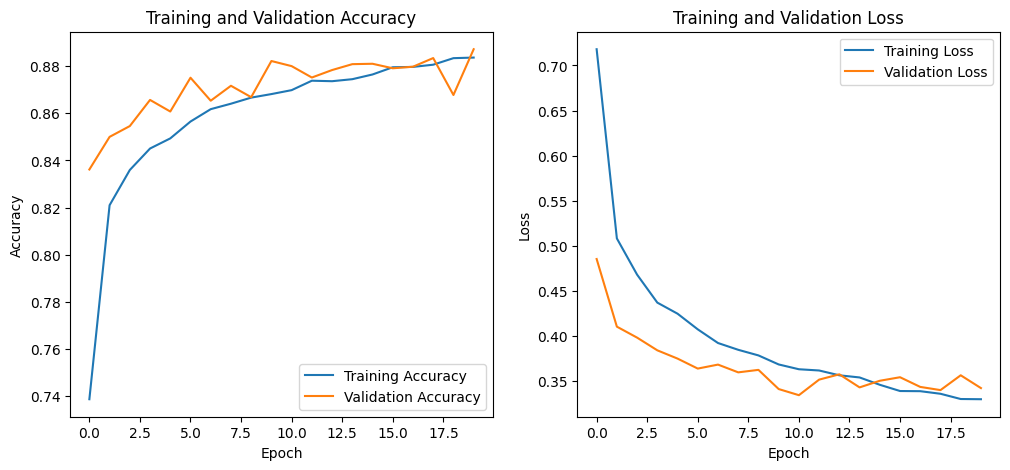

In [26]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


**Test Prediction**

It displays the first 25 images with their true and predicted labels, enabling evaluation of the model's performance and identification of areas where it performs well or encounters challenges in classification.

313/313 [==============================] - 1s 3ms/step


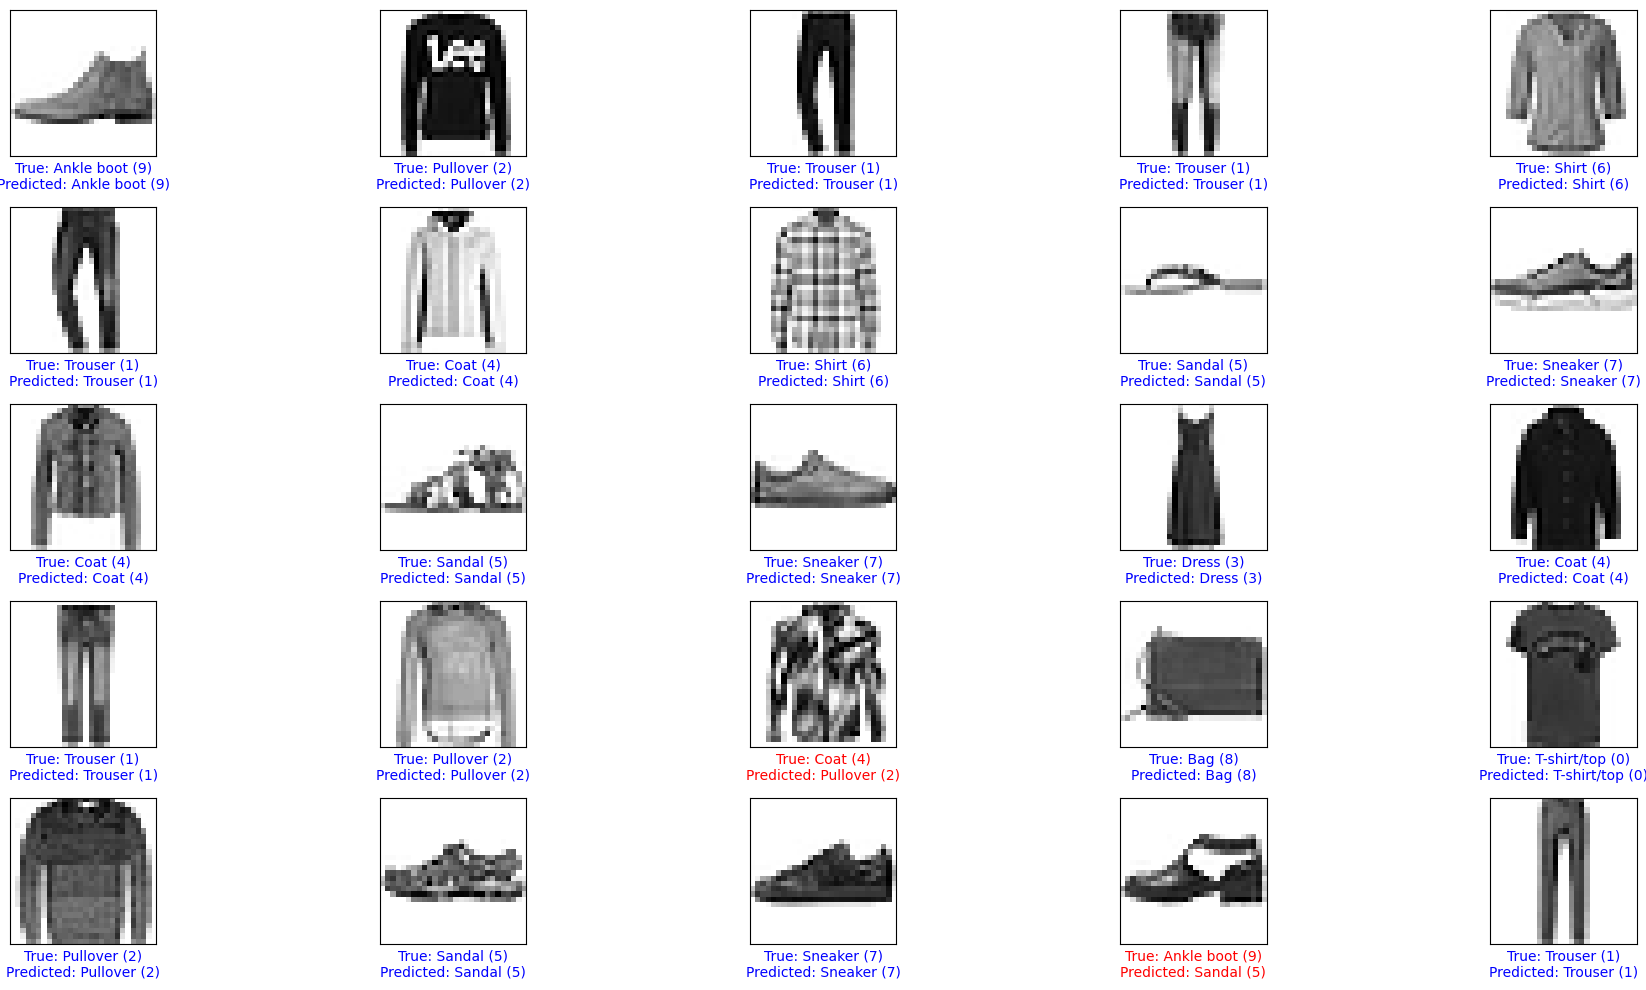

In [13]:
# Predict on the test set
predictions = model.predict(x_test)

# Class names for Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to plot a single image and prediction
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    true_label_name = class_names[true_label]
    predicted_label_name = class_names[predicted_label]
    color = 'blue' if true_label == predicted_label else 'red'
    plt.xlabel(f'True: {true_label_name} ({true_label})\nPredicted: {predicted_label_name} ({predicted_label})', color=color)

# Display the first 10 predictions
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plot_image(i, predictions, y_test, x_test)
plt.tight_layout()
plt.show()